In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# dataset link
!kaggle datasets download -d utkarshsaxenadn/car-vs-bike-classification-dataset

 93% 96.0M/103M [00:01<00:00, 59.8MB/s]
100% 103M/103M [00:01<00:00, 77.9MB/s] 


In [ ]:
!unzip /content/car-vs-bike-classification-dataset.zip

Archive:  /content/car-vs-bike-classification-dataset.zip
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).png  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).png  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1000).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1001).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1002).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1003).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1004).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1005).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1006).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1007).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1008).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1009)

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio("/content/Car-Bike-Dataset", output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 4000 files [00:00, 7488.18 files/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from tensorflow.keras.layers import *

train_path="/content/output/train"
val_path="/content/output/val"
test_path="/content/output/test"

In [ ]:
# PART 1 - IMPORT LIBRARIES AND PACKAGES

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# PART 2 - IMAGE DATA AUGMENTATION
batch_size = 32
from keras.preprocessing.image import ImageDataGenerator

# Define the augmentation parameters
train_aug = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1
)
val_aug = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1
)
test_aug = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1
)

In [ ]:
# PART 3 - CREATING LABELLED DATA
# Flow training images in batches of 128 using train_datagen generator
train_datagen = train_aug.flow_from_directory(
    train_path,
    color_mode ="rgb",
    target_size=(128,128),
    batch_size=32,
    class_mode='binary')
val_datagen = val_aug.flow_from_directory(
    val_path,
    color_mode ="rgb",
    target_size=(128,128),
    batch_size=32,
    class_mode='binary')
test_datagen = test_aug.flow_from_directory(
    test_path,
    color_mode ="rgb",
    target_size=(128,128),
    batch_size=32,
    class_mode='binary')

Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


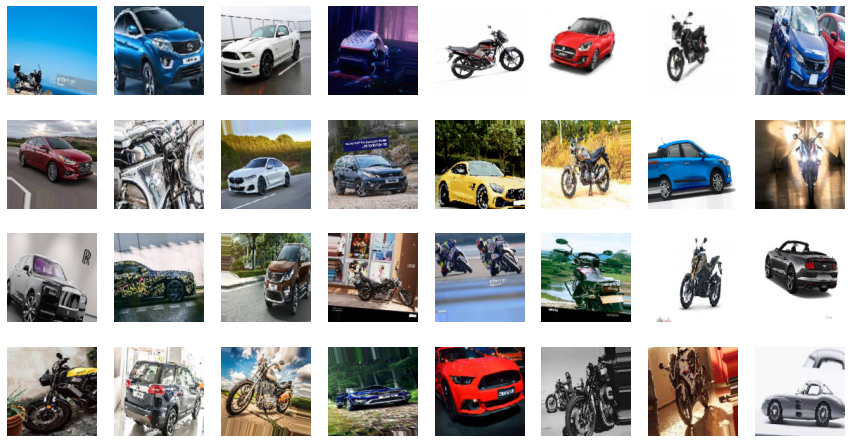

In [ ]:
# Generate a batch of augmented images
augmented_images, labels = next(train_datagen)

# Visualize the augmented images
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(augmented_images[i])
    ax.axis('off')
plt.show()

In [ ]:
# mention classes

class_names=list(train_datagen.class_indices)
class_names
img_config = dict(cls_names = class_names, size = train_datagen.target_size )
img_config

{'cls_names': ['Bike', 'Car'], 'size': (128, 128)}

In [ ]:
# PART 4 - CUSTOM CNN ARCHITECTURE
import tensorflow as tf

from keras.layers import Dropout, BatchNormalization

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),padding='same', activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2),2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),2),     
     
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),2),   
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# PART 5 - VIEW DETAILS OF CNN ARCHIOTECTURE
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)     

In [ ]:
# PART 6 - COMPILING MODEL
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(0.001),
             metrics=['accuracy'])

In [ ]:
# # PART 6 - DEFINING CALLBACKS

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Defined checkpoint to save the best model
checkpoint_path = "best_model.h5"
checkpoint = ModelCheckpoint(
    checkpoint_path, 
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max'
)

# # # Defined early stopping to prevent overfitting
# # early_stop = EarlyStopping(
# #     monitor='val_loss', 
# #     patience=3, 
# #     verbose=1, 
# #     mode='min', 
# #     restore_best_weights=True
# # )

In [ ]:
# PART 7 - TRAINING MODEL

# Define the number of epochs
n_epochs = 20

# Calculate the number of training and validation samples
total_sample = train_datagen.n
val_sample = val_datagen.n

# Train the model with callbacks
history = model.fit(
    train_datagen,
    epochs=n_epochs,
    verbose=1,
    validation_data=val_datagen,
    callbacks=[checkpoint]
)


Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 0.6994 - accuracy: 0.6509
Epoch 1: val_accuracy improved from -inf to 0.82000, saving model to best_model.h5
100/100 [==============================] - 151s 1s/step - loss: 0.6994 - accuracy: 0.6509 - val_loss: 0.4227 - val_accuracy: 0.8200
Epoch 2/20
100/100 [==============================] - ETA: 0s - loss: 0.3554 - accuracy: 0.8484
Epoch 2: val_accuracy improved from 0.82000 to 0.86750, saving model to best_model.h5
100/100 [==============================] - 136s 1s/step - loss: 0.3554 - accuracy: 0.8484 - val_loss: 0.3356 - val_accuracy: 0.8675
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.2874 - accuracy: 0.8847
Epoch 3: val_accuracy improved from 0.86750 to 0.87250, saving model to best_model.h5
100/100 [==============================] - 124s 1s/step - loss: 0.2874 - accuracy: 0.8847 - val_loss: 0.2963 - val_accuracy: 0.8725
Epoch 4/20
100/100 [==============================] - ETA: 0s

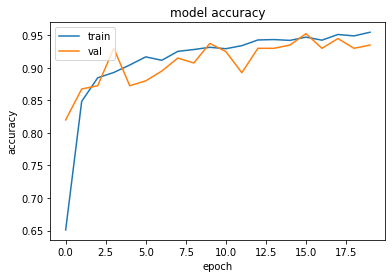

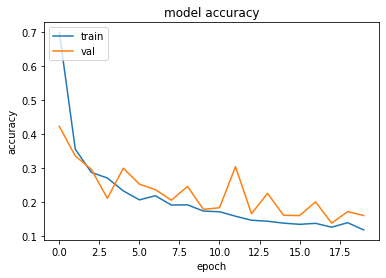

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(val_datagen)
score

13/13 [==============================] - 5s 360ms/step - loss: 0.1297 - accuracy: 0.9525


[0.12972933053970337, 0.9524999856948853]

In [ ]:
import cv2
import numpy as np

In [ ]:
# load model
model=tf.keras.models.load_model("/content/best_model.h5")

In [ ]:
def predict_image(image_path,size=(128,128)):
    x=cv2.imread(image_path)
    # convert color
    x=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
    # change size
    x=cv2.resize(x,(128,128))
    # expand dimentions
    x=np.expand_dims(x,axis=0)
    # model prediction
    result=model.predict(x)
    print(result)
    if result[0]<0.5:
        print("Bike")
    else:
        print("Car")

In [ ]:
predict_image("/content/car.jpg")

1/1 [==============================] - 0s 82ms/step
[[1.]]
Car


In [ ]:
predict_image("/content/bike1.jpg")

1/1 [==============================] - 0s 33ms/step
[[1.]]
Car


In [ ]:
predict_image("/content/bike2.jpg")

1/1 [==============================] - 0s 32ms/step
[[0.]]
Bike


1.0


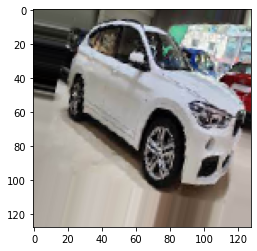

In [ ]:
sample=test_datagen.next()
n=6
plt.imshow(sample[0][n])
print(sample[1][n])

In [ ]:
img = (sample[0][n])
img_array = tf.expand_dims(img, 0)  # Create batch axis 0
predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent bike  and %.2f percent car."
    % (100 * (1 - score), 100 * score)
) # Will print on the Console

1/1 [==============================] - 0s 82ms/step
This image is 0.67 percent bike  and 99.33 percent car.


In [ ]:
def Making_predictions (arr):
    image_array = tf.expand_dims(arr,0)
    predictions = model.predict (image_array)
    score = predictions[0]
    print(
        "This image is %.2f percent bike  and %.2f percent car."
        % (100 * (1 - score), 100 * score)) # Will print on the Console

1/1 [==============================] - 0s 34ms/step
This image is 91.24 percent bike  and 8.76 percent car.


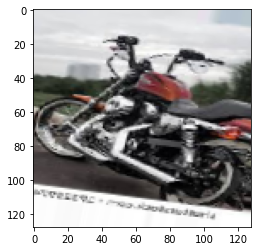

1/1 [==============================] - 0s 34ms/step
This image is 0.28 percent bike  and 99.72 percent car.


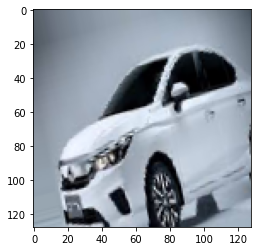

1/1 [==============================] - 0s 33ms/step
This image is 84.01 percent bike  and 15.99 percent car.


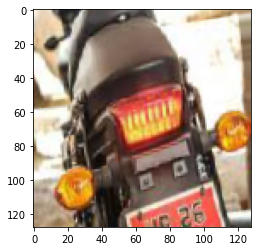

1/1 [==============================] - 0s 38ms/step
This image is 0.14 percent bike  and 99.86 percent car.


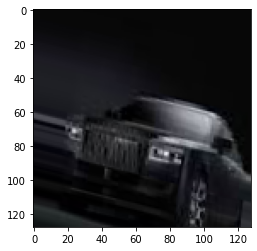

1/1 [==============================] - 0s 31ms/step
This image is 1.07 percent bike  and 98.93 percent car.


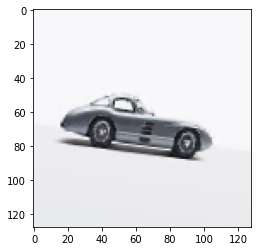

In [ ]:
for _ in range(5):
    img, label = test_datagen.next()
#     print (img.shape)
    Making_predictions(img[0])
    #print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [ ]:
# creating zip file of dataset
!zip -r /content/output.zip -r /content/output

updating: content/output/ (stored 0%)
updating: content/output/val/ (stored 0%)
updating: content/output/val/Bike/ (stored 0%)
updating: content/output/val/Bike/Bike (406).jpeg (deflated 0%)
updating: content/output/val/Bike/Bike (433).jpeg (deflated 0%)
updating: content/output/val/Bike/images (54).jpeg (deflated 1%)
updating: content/output/val/Bike/Bike (242).jpeg (deflated 0%)
updating: content/output/val/Bike/Bike (747).jpeg (deflated 0%)
updating: content/output/val/Bike/Bike (1166).jpeg (deflated 2%)
updating: content/output/val/Bike/Bike (558).jpeg (deflated 0%)
updating: content/output/val/Bike/Bike (1107).jpeg (deflated 0%)
updating: content/output/val/Bike/Bike (68).jpeg (deflated 3%)
updating: content/output/val/Bike/Bike (335).jpeg (deflated 8%)
updating: content/output/val/Bike/Bike (249).jpeg (deflated 1%)
updating: content/output/val/Bike/Bike (1455).jpeg (deflated 1%)
updating: content/output/val/Bike/Bike (1242).jpeg (deflated 4%)
updating: content/output/val/Bike/Bik

In [ ]:
#saving dataset to drive
!cp /content/output.zip /content/drive/MyDrive/my_dataset/car_vs_bike

In [ ]:
#saving model to drive
!cp /content/best_model.h5 /content/drive/MyDrive/my_models/car_vs_bike